#Classification Implementation

## Dataset Used: AutoMPG
### Dataset Source: https://archive.ics.uci.edu/ml/datasets/auto+mpg


## Import all required modules

In [48]:
# Data Manipulation, Linear Algebra
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.cluster import KMeans

from sklearn import svm, tree, linear_model, neighbors, discriminant_analysis, neural_network

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
PATH = "./drive/MyDrive/Colab Notebooks/Machine Learning/auto-mpg.csv"

In [51]:
df = pd.read_csv(PATH, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Exploratory Data Analysis

### Checking for null values

In [53]:
df[['horsepower']] = df[['horsepower']].replace("?", np.nan)

In [54]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [55]:
df.horsepower = pd.to_numeric(df.horsepower)
df[['horsepower']] = df[['horsepower']].replace(np.nan, df.horsepower.median())

In [56]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Count of Cars of Each Year

In [57]:
df["model_year"].value_counts().sort_values(ascending=False)

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

#### We can observe that maximum cars are from 1973, 1978, 1976, and so on.

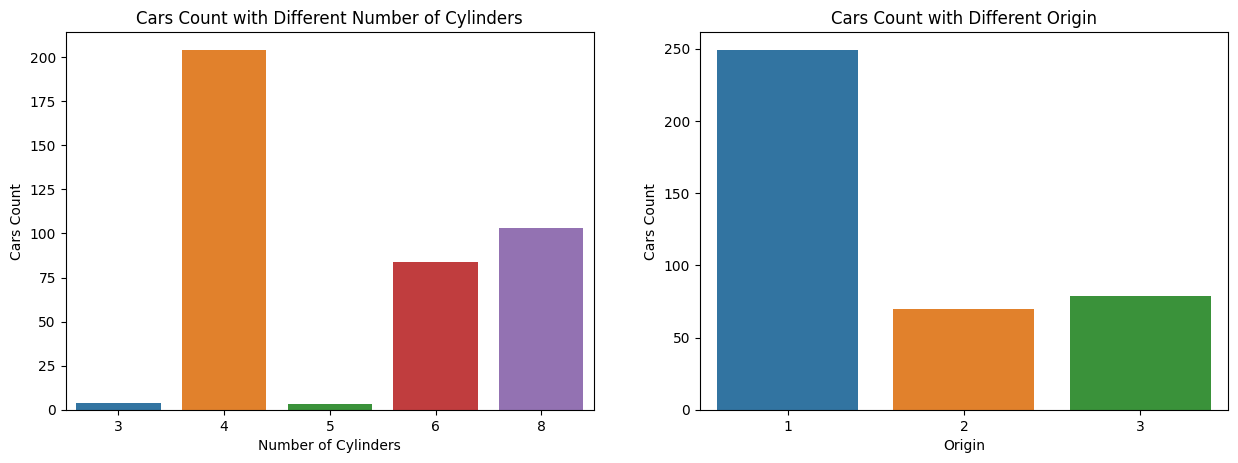

In [58]:
fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=2, dpi=100)

sns.countplot(x="cylinders", data=df, ax=axes[0])
axes[0].set_title("Cars Count with Different Number of Cylinders")
axes[0].set_ylabel("Cars Count")
axes[0].set_xlabel("Number of Cylinders")

sns.countplot(x="origin", data=df, ax=axes[1])
axes[1].set_title("Cars Count with Different Origin")
axes[1].set_ylabel("Cars Count")
axes[1].set_xlabel("Origin")

plt.show()

#### Most Cars have 4 Cylinders
#### Most Cars are from Origin "1"

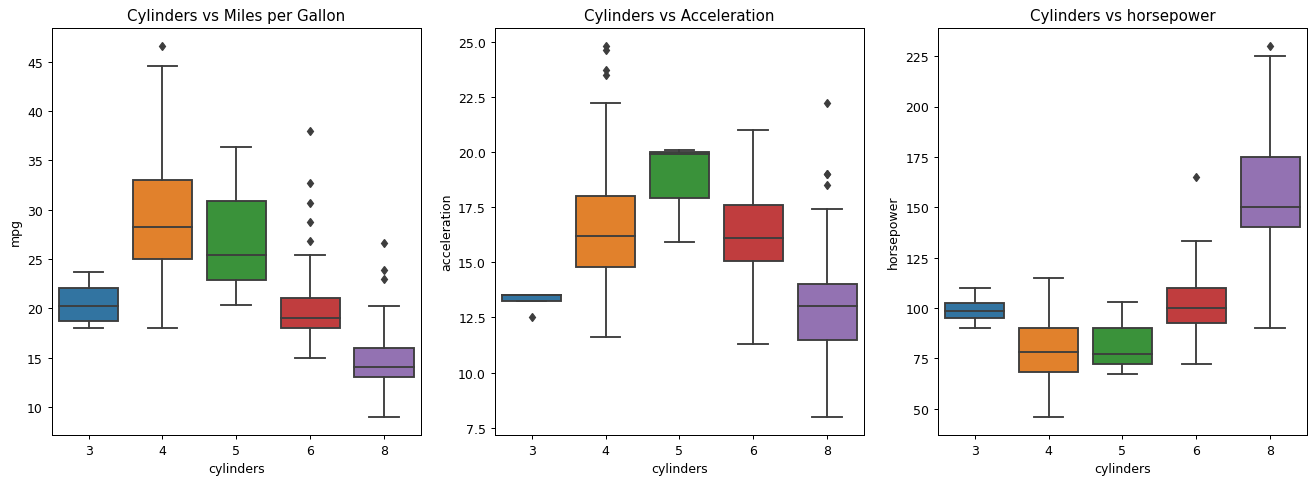

In [59]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.boxplot(x="cylinders", y="mpg", data=df, ax=axes[0])
axes[0].set_title("Cylinders vs Miles per Gallon")

sns.boxplot(x="cylinders", y="acceleration", data=df, ax=axes[1])
axes[1].set_title("Cylinders vs Acceleration")

sns.boxplot(x="cylinders", y="horsepower", data=df, ax=axes[2])
axes[2].set_title("Cylinders vs horsepower")

plt.show()

#### Cars with 4 Cylinders have highest mileage
#### Cars with 5 Cylinders have highest acceleration
#### 8 Cylinder cars have higher Horsepower

## Distributon Plots for Continious Features

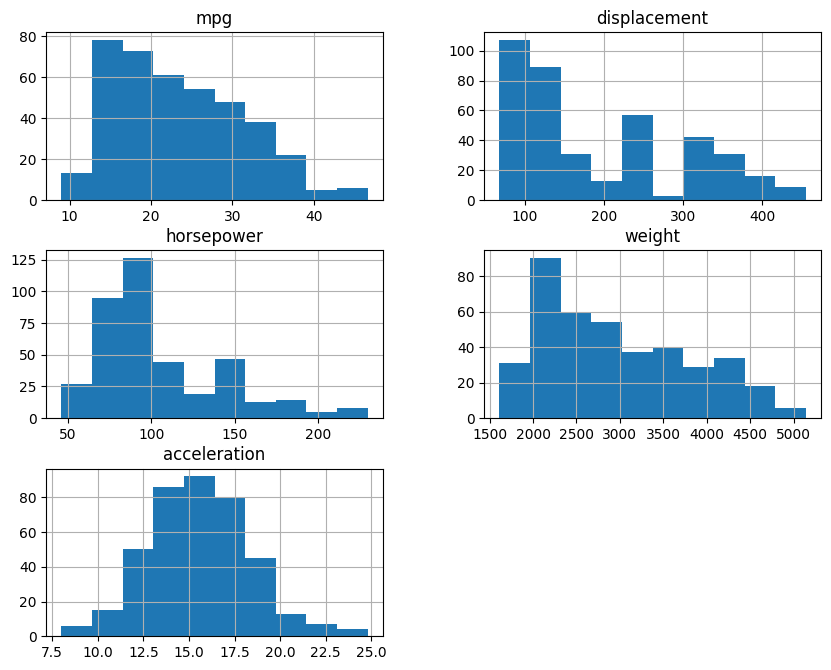

In [60]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (10, 8)
df[["mpg", "displacement", "horsepower", "weight", "acceleration"]].hist()
plt.show()

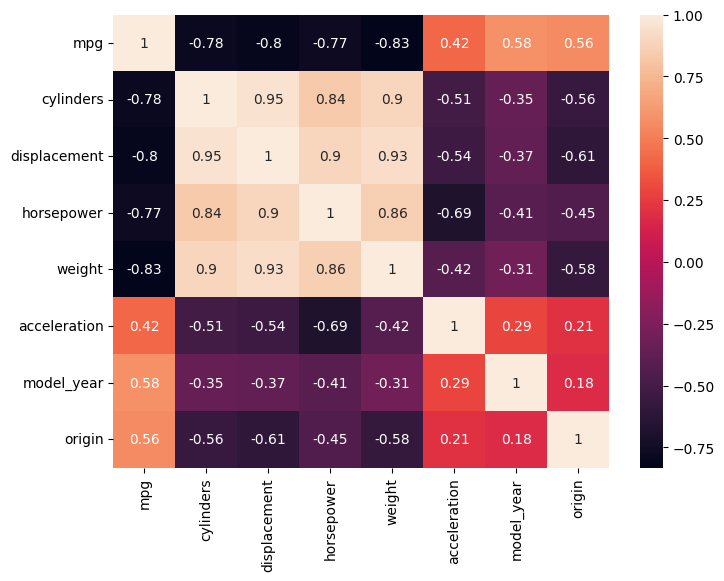

In [61]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.heatmap(df.corr(), annot=True)
plt.show()

# Feature Engineering

In [62]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [63]:
car_company = []
for car_name in df["car_name"]:
    car_name = car_name.split(" ")
    car_company.append(car_name[0])

In [64]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [65]:
df["car_company"] = car_company
df.drop("car_name", inplace=True, axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_company
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford


## Encoding Categorical Variable - Car Company

In [66]:
le = LabelEncoder()
df["car_company"] = le.fit_transform(df["car_company"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_company
0,18.0,8,307.0,130.0,3504,12.0,70,1,7
1,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,25
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,13


# Preparing Data

## Feature Scaling using StandardScaler

In [67]:
sc = StandardScaler()
scaled_df = sc.fit_transform(df.copy())

## Applying Principal Compnent Analysis

In [68]:
# Reducing the Number of Features in the Dataset using PCA
pca = PCA(2)
pca_df = pca.fit_transform(scaled_df)

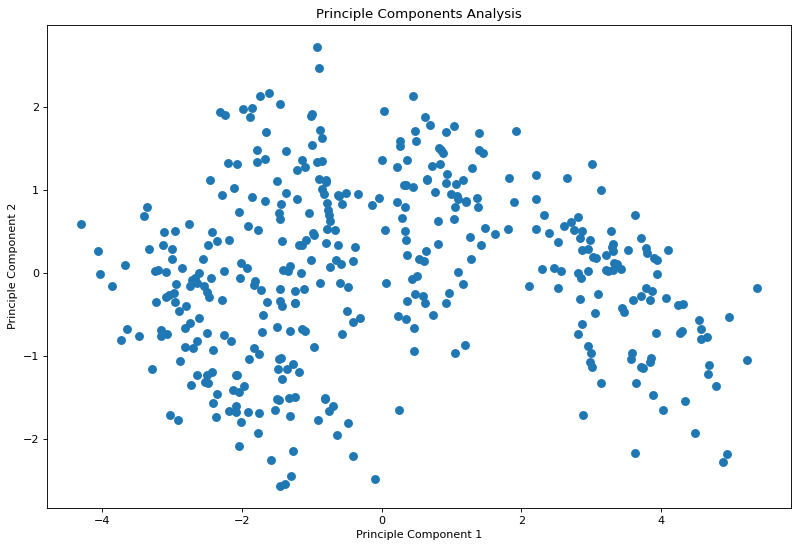

In [69]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
plt.scatter(x=pca_df[:,0], y=pca_df[:,1], lw=2)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Principle Components Analysis")
plt.show()

# KMeans Model

## Using Elbow Method to Find Appropriate number of clusters

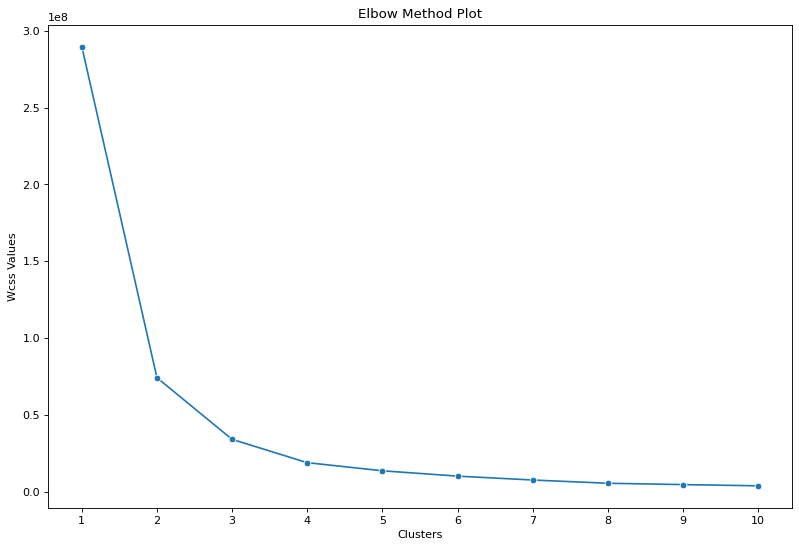

In [70]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        random_state=42
    )
    kmeans.fit(df)
    wcss.append([i, kmeans.inertia_]) # kmeans.inertial_ returns the calculated WCSS Values
    
wcss_dataframe = pd.DataFrame(wcss, columns=["clusters", "wcss value"])

# Plot for Elbow Method
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.lineplot(
    x = wcss_dataframe.clusters.values,
    y = wcss_dataframe["wcss value"], marker="o")
plt.xticks(np.arange(1, 11))
plt.xlabel("Clusters")
plt.ylabel("Wcss Values")
plt.title("Elbow Method Plot")
plt.show()

### From Elbow Method it is Clear that we have 3 Clusters

## Generating Our Clusters using Kmeans

In [71]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = pd.Series(kmeans.fit_predict(scaled_df))
y_kmeans

0      1
1      1
2      1
3      1
4      1
      ..
393    2
394    0
395    2
396    2
397    2
Length: 398, dtype: int32

In [72]:
y_kmeans.value_counts()

0    149
2    149
1    100
dtype: int64

## Centeroids

In [73]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Visualizing Clusters

In [74]:
pca_dataframe = pd.DataFrame(pca_df, columns=["PCA 1", "PCA 2"])
pca_dataframe["Cluster"] = y_kmeans
pca_dataframe.sample(10)

,PCA 1,PCA 2,Cluster
311,-1.778208,1.475322,2
368,-1.448644,2.037364,2
333,-0.404218,-0.591653,0
329,-3.231641,-0.347391,0
382,-3.062819,-0.739869,0
259,0.050146,0.520810,2
160,1.032276,1.771668,2
8,4.939063,-2.179914,1
348,-3.474336,-0.761172,0
203,-2.003070,-1.798875,0


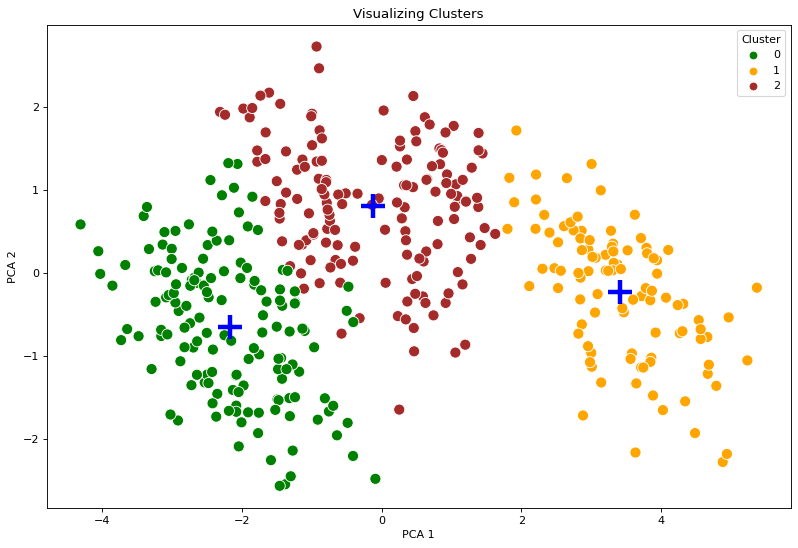

In [75]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 80
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Cluster", data=pca_dataframe, palette=['green','orange','brown'], s=100)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1], marker="+", s=500, linewidths=3, lw=4, color="blue", zorder=10)
plt.title("Visualizing Clusters")
plt.show()

In [76]:
df["Cluster"] = y_kmeans
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_company,Cluster
0,18.0,8,307.0,130.0,3504,12.0,70,1,7,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,3,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,25,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,13,1


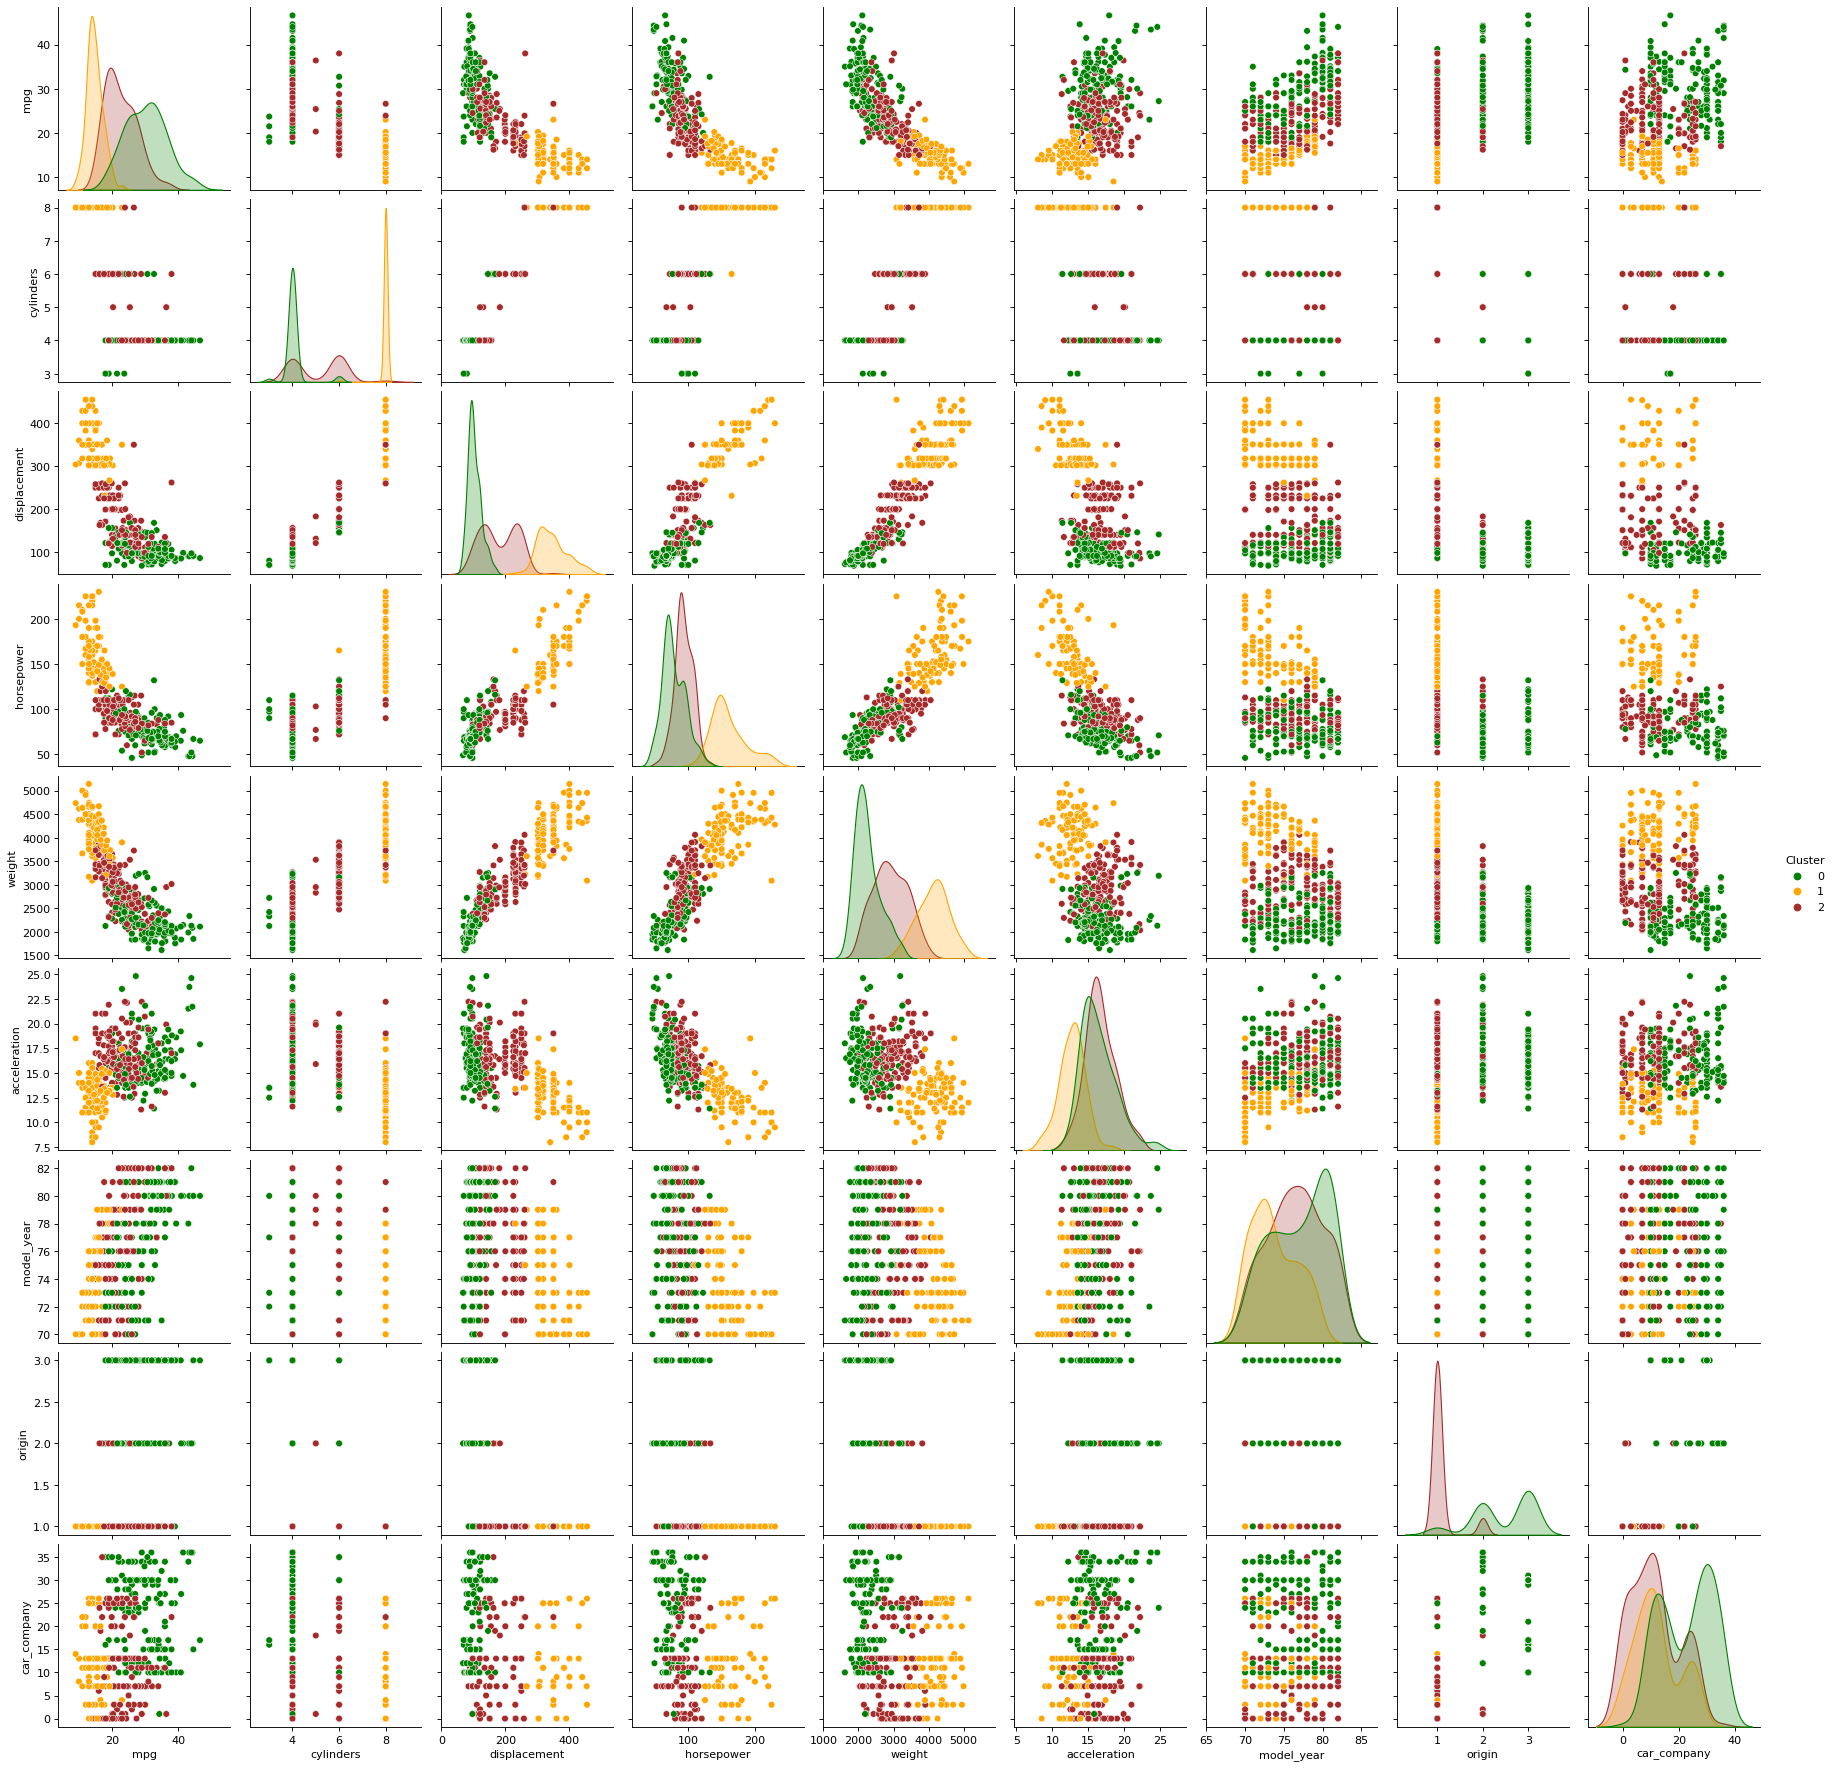

In [77]:
sns.pairplot(df, hue="Cluster", palette=['green','orange','brown'])
plt.show()

# Classification

## Preparing Data for Classification Model

In [78]:
X = df.drop("Cluster", axis=1).values
y = df.Cluster

## Splitting Data into Training and Testing Set

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling for Logistic Regression

In [80]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Multiple ML Model Testing

### Dataframe to store all the accuracy scores for Comparison and Analysis

In [81]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

        print(MLA_name, "Done")
        row_index+=1

In [82]:
MLA = [
        
    #GLM
    linear_model.RidgeClassifierCV(),
    linear_model.Perceptron(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(),

    #MLP
    neural_network.MLPClassifier(),

    ]

MLA_testing(MLA=MLA, X_train=X_train, X_test=X_test)

RidgeClassifierCV Done
Perceptron Done
KNeighborsClassifier Done
SVC Done
DecisionTreeClassifier Done
MLPClassifier Done


In [83]:
# Scaled Data Used Here
MLA = [    
    #GLM
    linear_model.LogisticRegressionCV()
]
MLA_testing(MLA=MLA, X_test=X_test_scaled, X_train=X_train_scaled)

LogisticRegressionCV Done


# Comparing Models

In [84]:
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,LogisticRegressionCV,100.0,98.417339
1,Perceptron,47.5,52.439516
2,KNeighborsClassifier,80.0,79.566532
3,SVC,77.5,78.618952
4,DecisionTreeClassifier,92.5,95.897177
5,MLPClassifier,87.5,79.677419


In [85]:
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)[:10]
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,LogisticRegressionCV,100.0,98.417339
1,DecisionTreeClassifier,92.5,95.897177
2,MLPClassifier,87.5,79.677419
3,KNeighborsClassifier,80.0,79.566532
4,SVC,77.5,78.618952
5,Perceptron,47.5,52.439516


# Logistic Regression Classification

In [86]:
classifier = linear_model.LogisticRegressionCV()
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print("Test Accuracy : ", accuracy*100, "%", "\n")

Test Accuracy :  100.0 % 



# Multi Layer Perceptron classification

In [87]:
classifier = neural_network.MLPClassifier()
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print("Test Accuracy : ", accuracy*100, "%", "\n")

Test Accuracy :  100.0 % 



# Support Vector Classification

In [88]:
classifier = svm.SVC(probability=True)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print("Test Accuracy : ", accuracy*100, "%", "\n")

Test Accuracy :  98.75 % 



# Confusion Matrix

Confusion Matrix 
 [[28  0  1]
 [ 0 20  0]
 [ 0  0 31]] 



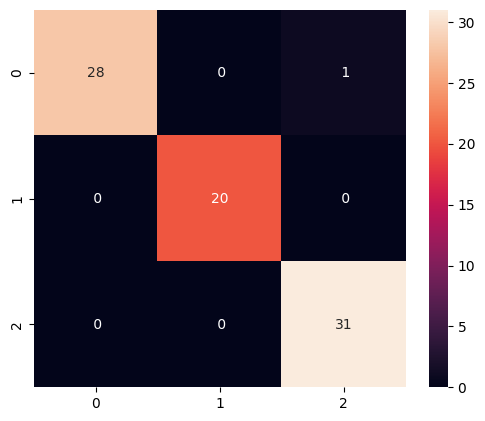

In [89]:
print("Confusion Matrix \n", cm, "\n")

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams["figure.dpi"] = (100)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='2.0f')
plt.show()